# Background:
We investigated top-rated movies in the International movie database (IMDB) for what really makes them great movies. Our aim was to find out about the natural patterns that exists among the top 250 movies from IMDB. We use here unsupervised machine learning techniques (more specifically, clustering algorithms) to search and observe each cluster information.

In [132]:
import requests
from bs4 import BeautifulSoup as bs
from collections import OrderedDict
import string
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set(style="ticks")

In [133]:
import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\life4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\life4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\life4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\life4\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\life4\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [134]:
# Importing the Top 250 Movies from IMDb

r = requests.get("https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=WQTEXHD19MG891AT5W85&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_3")
r

<Response [200]>

In [135]:
#Extracting the "a" elements from the webpage

soup = bs(r.content)
strings = soup.find_all("a")
# strings

In [136]:
#Extracting the movie IDs

webpage = bs(r.content)
links = webpage.select("tbody.lister-list a")
imdb_ids_uncut = [link['href'] for link in links]
imdb_ids = [movie[7:-1] for movie in imdb_ids_uncut]


imdb_ids = list(OrderedDict.fromkeys(imdb_ids))

In [137]:
#Create a looping request to the API OMDb and store them all in a single file

HEADERS = {'user-agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5)'
                          'AppleWebKit/537.36 (KHTML, like Gecko)'
                          'Chrome/45.0.2454.101 Safari/537.36'),
                          'referer': 'http://www.omdbapi.com'}

omdb_first_half_url = "http://www.omdbapi.com/?i="
omdb_second_half_url = "&apikey=c8091ac8"

omdb_urls = []

for imdb_id in imdb_ids:
    full_url = omdb_first_half_url + imdb_id + omdb_second_half_url
    omdb_urls.append(full_url)
    

data_list = []
    
    
for url in omdb_urls:
    data = requests.get(url, headers = HEADERS).json()
    data_list.append(data)

    
with open('data_list.json', 'w') as outfile:
    json.dump(data_list, outfile)

In [138]:
df_omdb = pd.read_json('data_list.json')
df_omdb.to_csv('data_list.csv', encoding='utf-8')
pd.set_option('display.max_columns', None)
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",81,9.3,"2,598,671",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,797,972",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,574,403",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,238,633",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",The jury in a New York City murder trial is fr...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"767,808",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True


In [139]:
#Improve plot data for later use in clustering by scraping IMDb a little more

first_half_imdb_url='https://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(imdb_ids))]
for i in range(250):
#     time.sleep(10)
    page=requests.get(first_half_imdb_url+df_omdb.imdbID[i]+t, timeout = 5).content
    soup=bs(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})

    for j in class_:
        plot[i].append(j.get_text(strip = True))
 
        
df_omdb['Plot']=plot 

In [140]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",81,9.3,"2,598,671",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,797,972",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,574,403",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,238,633",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[The jury in a New York City murder trial is f...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"767,808",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True


In [141]:
df1 = df_omdb.dropna(axis=1)
df1.shape

(250, 25)

Now that we have the data we need, we will first start cleaning the data and converting it to data we can use for our featureanalysis later on. We will begin by creating dummies for data columns such as the Year.
We will also look at categories OHE them into dataframe

In [143]:
#Inspecting runtime for use in analysis

for i in range(250):
    df1.Runtime[i]=df1.Runtime[i].split()[0]

df1['Runtime']=pd.to_numeric(df1['Runtime'],errors='coerce')
df1.Runtime.describe()

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/3152990530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Runtime[i]=df1.Runtime[i].split()[0]


count    250.000000
mean     128.956000
std       30.027331
min       45.000000
25%      107.250000
50%      126.500000
75%      145.000000
max      238.000000
Name: Runtime, dtype: float64

In [144]:
#Inspecting Year column.

df1.Year=pd.to_numeric(df1.Year)
df1.Year.describe()

count     250.000000
mean     1986.456000
std        25.214423
min      1921.000000
25%      1966.250000
50%      1994.000000
75%      2006.750000
max      2022.000000
Name: Year, dtype: float64

In [145]:
#Converting Year to categorical and OHE it.

for i in range(250):
    if df1.Year[i] < 1987:
        df1.Year[i] = 0
    else:
        df1.Year[i] = 1
        
dummy_year=pd.get_dummies(df1.Year)

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/1992026029.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Year[i] = 1
C:\Users\life4\AppData\Local\Temp/ipykernel_18812/1992026029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Year[i] = 0


In [146]:
#Columns for actors, directors and writers are strings with the names separated by commas, these will each be converted to lists
#that have each name separated by a function. We will also write a function that returns the most frequently used words in a
#column. Lastly we will write a function that plots the most commonly occuring words in a column.

def clean(column_name):
    name=set()
    for name_string in df1[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(15,8))
    else:
        return nlt[:].plot(kind = "bar",figsize=(15,8))

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/2406690281.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]]


<AxesSubplot:>

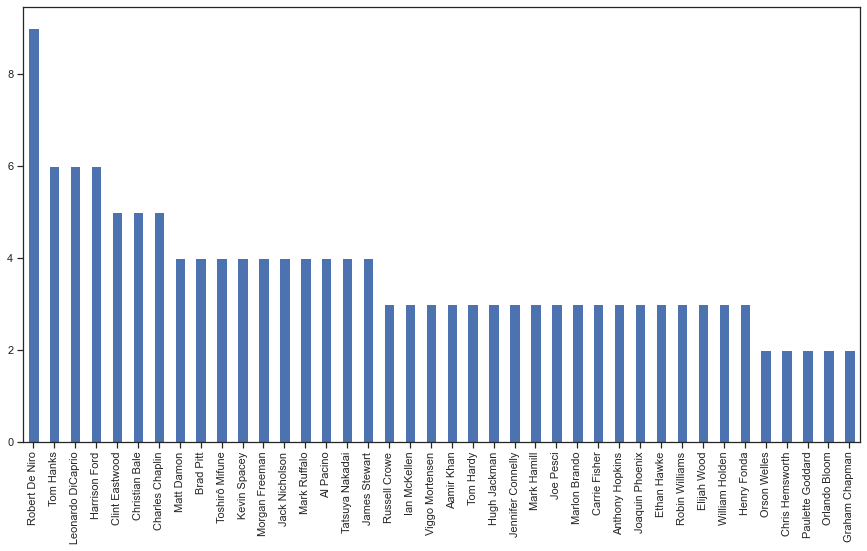

In [147]:
#Lets look at the 40 most frequently appearing actors in our dataset

plot_column('Actors', 40)

In [148]:
#Let's add all the actors that have 3 or more mentions to our dataset.

actors=top('Actors')

for actor in actors[:30]:
    df1["Actor:"+actor] = [int(actor in a.split(', ')) for a in df1.Actors]

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/2406690281.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]]


C:\Users\life4\AppData\Local\Temp/ipykernel_18812/2406690281.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]]


<AxesSubplot:>

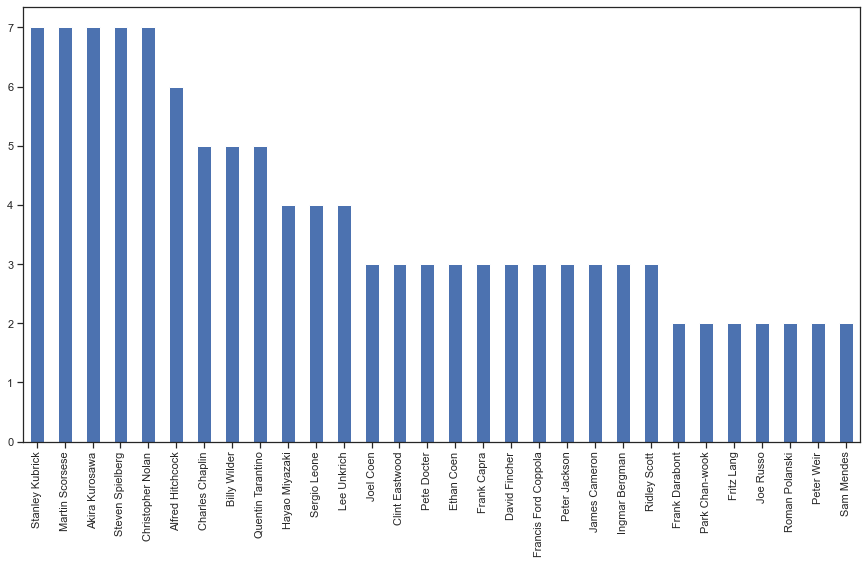

In [149]:
#Now lets look at the directors column.

plot_column('Director', 30)

In [150]:
#Adding the directors with 3 or more mentions

directors=top('Director')
    
for director in directors[:20]:
    df1["Director:"+director] = [int(director in d.split(', ')) for d in df1.Director]    

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/2406690281.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]]


C:\Users\life4\AppData\Local\Temp/ipykernel_18812/2406690281.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dummy_name[n]=[int(n in nm.split(', ')) for nm in df1[column_name]]


<AxesSubplot:>

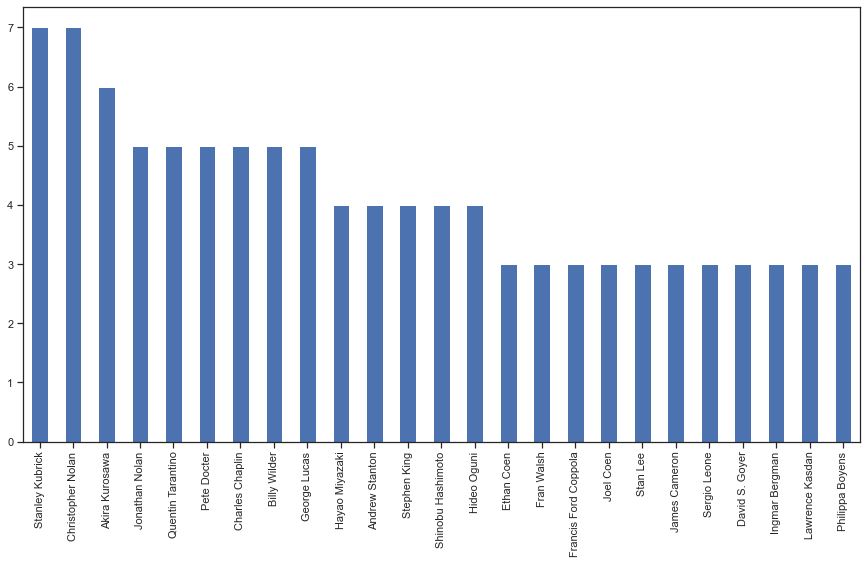

In [151]:
#Looking at the writers, decided not to include as they seem to have a negative effect on PCA.

plot_column('Writer', 25)

<AxesSubplot:>

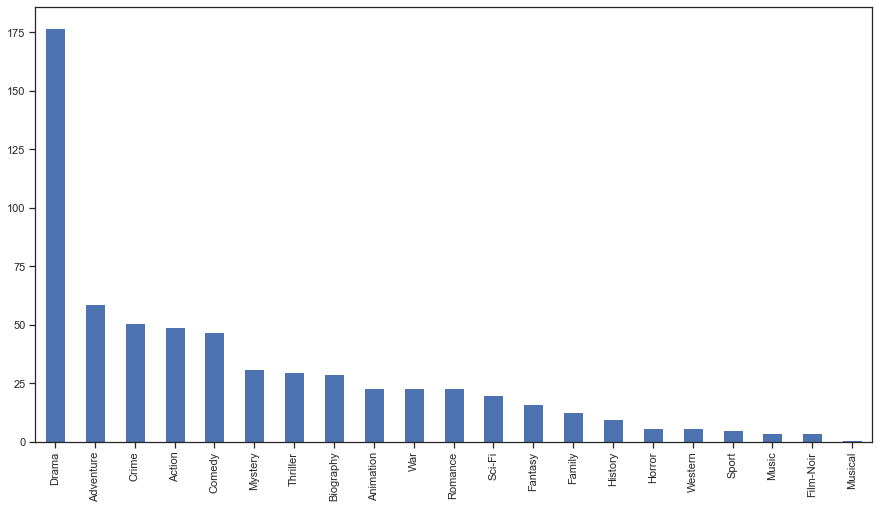

In [152]:
#Lets see all the genres in our dataframe and how often they appear; the distribution of genres appeares skewed with more drama movies

plot_column('Genre')

In [153]:
#Adding all genres to the dataframe

genres=clean('Genre')

for genre in genres:
    df1["genre:"+genre] = [int(genre in g.split(', ')) for g in df1.Genre]

<AxesSubplot:>

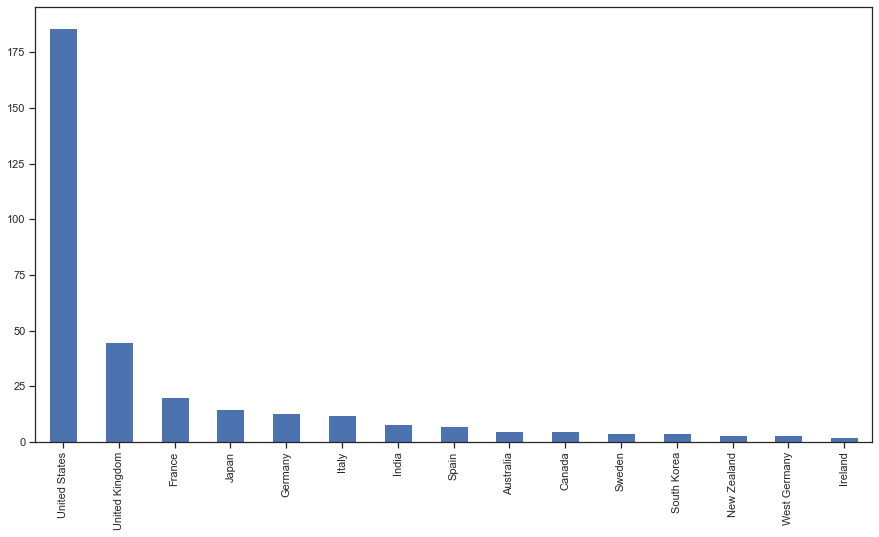

In [154]:
plot_column('Country', 15)

In [155]:
#Adding top 10 countries to dataframe

countries=top('Country')

for country in countries[:10]:
    df1["Country:"+country] = [int(country in c.split(', ')) for c in df1.Country]

In [156]:
df1.head(3)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Actor:Robert De Niro,Actor:Tom Hanks,Actor:Leonardo DiCaprio,Actor:Harrison Ford,Actor:Clint Eastwood,Actor:Christian Bale,Actor:Charles Chaplin,Actor:Matt Damon,Actor:Brad Pitt,Actor:Toshirô Mifune,Actor:Kevin Spacey,Actor:Morgan Freeman,Actor:Jack Nicholson,Actor:Mark Ruffalo,Actor:Al Pacino,Actor:Tatsuya Nakadai,Actor:James Stewart,Actor:Russell Crowe,Actor:Ian McKellen,Actor:Viggo Mortensen,Actor:Aamir Khan,Actor:Tom Hardy,Actor:Hugh Jackman,Actor:Jennifer Connelly,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Marlon Brando,Actor:Carrie Fisher,Actor:Anthony Hopkins,Actor:Joaquin Phoenix,Director:Stanley Kubrick,Director:Martin Scorsese,Director:Akira Kurosawa,Director:Steven Spielberg,Director:Christopher Nolan,Director:Alfred Hitchcock,Director:Charles Chaplin,Director:Billy Wilder,Director:Quentin Tarantino,Director:Hayao Miyazaki,Director:Sergio Leone,Director:Lee Unkrich,Director:Joel Coen,Director:Clint Eastwood,Director:Pete Docter,Director:Ethan Coen,Director:Frank Capra,Director:David Fincher,Director:Francis Ford Coppola,Director:Peter Jackson,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Country:United States,Country:United Kingdom,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Australia,Country:Canada
0,The Shawshank Redemption,1,R,14 Oct 1994,142,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",81,9.3,"2,598,671",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,797,972",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Dark Knight,1,PG-13,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,574,403",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


Now that we have cleaned up the data and have a general idea of what data we will be using as our features, we will now beginlooking more in depth at the Plot column and use machine learning to identify the words that occur frequently and also have sufficient meaning relating to the titles they are associated with for use as features in our analysis. 

In [158]:
#First things first, we need to clean the Plot data from special characters and filler words. We will do this by creating a
#function for text cleaning, tokenizing, lemmatizing and POS Tagging such that our code with be able to make sense of the text.

def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens

In [159]:
n_plots = len(df1['Plot']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = df1['Plot'].map(str) # place all text reviews in reviews
tfidf=True #Trigger for using weighted frequencies by IDF

In [160]:
# Create Word Frequency by Review Matrix using Custom Analyzer

cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")


Terms with Highest Frequency:
tell            2116
see             1366
back            1359
man             1206
say             1069
time            1064
two             1020
try             1005
kill            1003
give             984
come             952
life             922
know             873
call             808
new              781
men              780
day              770
get              764
father           763
work             734
begin            733
return           732
look             724
year             723
want             709
meet             695
away             686
home             671
name             667
room             666
run              661
help             660
also             651
car              614
old              614
way              599
police           590
young            575
head             574
family           573
however          572
like             571
first            567
friend           558
turn             550
woman            542
sho

In [161]:
# Here we replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Constructing Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')

Constructing Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 250  rows, and 5410  columns.
The Term list has 5410  terms.

Terms with Highest TF-IDF Scores:
father             7.08
family             6.15
police             6.03
men                5.59
child              5.29
son                5.17
car                5.05
old                4.97
mother             4.80
young              4.78
wife               4.72
war                4.69
friend             4.66
boy                4.57
name               4.57
room               4.52
woman              4.50
love               4.45
money              4.41
live               4.25
german             4.16
fight              4.04
house              4.02
night              4.01
world              3.95
train              3.88
city               3.79
town               3.75
brother            3.74
murder             3.66
officer            3.66
show               3.66
girl               3.64
death              3.63
escape    

In [162]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)

In [163]:
## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/1584290615.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  freq.t = freq.T


In [164]:
## Taking top words from the entire dataframe
words_df = freq.t.T
top_words = ["young", "man", "help", "life", "war", "police", "family", "journey", 
             "money", "son", "boy", "world", "love", "save", "dark", "friends", "murder"]
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

C:\Users\life4\AppData\Local\Temp/ipykernel_18812/1300706552.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[df_encoded!=0] = 1
C:\Users\life4\anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [165]:
df_final = pd.concat([df1, df_encoded], axis=1)
df_final = df1.drop(['Released','Genre','Director','Writer','Actors','Plot','Language',\
                          'Country','Awards','Poster','Ratings','Metascore','imdbVotes','imdbID','Type',\
                         'DVD','BoxOffice','Production','Website','Response','Rated','imdbRating'],axis = 1)

In [166]:
df_final.dropna(inplace=True)
print(df_final.shape)
df_dbscan=df_final

(250, 84)


In [167]:
df_final.head()

,Title,Year,Runtime,Actor:Robert De Niro,Actor:Tom Hanks,Actor:Leonardo DiCaprio,Actor:Harrison Ford,Actor:Clint Eastwood,Actor:Christian Bale,Actor:Charles Chaplin,Actor:Matt Damon,Actor:Brad Pitt,Actor:Toshirô Mifune,Actor:Kevin Spacey,Actor:Morgan Freeman,Actor:Jack Nicholson,Actor:Mark Ruffalo,Actor:Al Pacino,Actor:Tatsuya Nakadai,Actor:James Stewart,Actor:Russell Crowe,Actor:Ian McKellen,Actor:Viggo Mortensen,Actor:Aamir Khan,Actor:Tom Hardy,Actor:Hugh Jackman,Actor:Jennifer Connelly,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Marlon Brando,Actor:Carrie Fisher,Actor:Anthony Hopkins,Actor:Joaquin Phoenix,Director:Stanley Kubrick,Director:Martin Scorsese,Director:Akira Kurosawa,Director:Steven Spielberg,Director:Christopher Nolan,Director:Alfred Hitchcock,Director:Charles Chaplin,Director:Billy Wilder,Director:Quentin Tarantino,Director:Hayao Miyazaki,Director:Sergio Leone,Director:Lee Unkrich,Director:Joel Coen,Director:Clint Eastwood,Director:Pete Docter,Director:Ethan Coen,Director:Frank Capra,Director:David Fincher,Director:Francis Ford Coppola,Director:Peter Jackson,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Country:United States,Country:United Kingdom,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Australia,Country:Canada
0,The Shawshank Redemption,1,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Dark Knight,1,152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,The Godfather Part II,0,202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,12 Angry Men,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [168]:
df_matrix = df_final.drop('Title',axis=1).to_numpy()
print(df_matrix.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

(250, 83)


In [169]:
df_matrix

array([[ 0.85096294,  0.43527566, -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714],
       [-1.1751393 ,  1.53647904, -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714],
       [ 0.85096294,  0.76897366, -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714],
       ...,
       [-1.1751393 ,  2.07039583, -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714],
       [ 0.85096294,  0.56875486, -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714],
       [ 0.85096294, -1.5001727 , -0.19324699, ..., -0.16972503,
        -0.14285714, -0.14285714]])

In [170]:
# We decided to include those components which explain more than 1% variance in the data.
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca37 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum37=sum(pca37.explained_variance_ratio_)
print(sum37/sumall)

37
['0.04', '0.04', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.785181270494937


In [171]:
first_comp = pca37.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_37_features=first_comps
Top_37_features

,weights,features,abs_weights
53,0.330265,genre:Action,0.330265
58,-0.321830,genre:Crime,0.321830
29,0.286142,Actor:Marlon Brando,0.286142
26,0.286142,Actor:Jennifer Connelly,0.286142
5,0.271825,Actor:Leonardo DiCaprio,0.271825
...,...,...,...
32,0.006769,Actor:Joaquin Phoenix,0.006769
15,-0.004720,Actor:Jack Nicholson,0.004720
0,-0.003832,Title,0.003832
37,0.001402,Director:Christopher Nolan,0.001402


In [172]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Xpca=pca37.transform(df_matrix)

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))

0.5 1: 0.11321182502299154
0.5 2: -0.24262611837125828
1 1: 0.11932248405414493
1 2: -0.2285941937659171
1 3: -0.3131384762868046
2 1: 0.1507638484257144
2 2: -0.12171058610162637
2 3: -0.24615230088653245
3 1: 0.1413371992597073
3 2: 0.023661521066243012
3 3: -0.03669283487243205
3 4: -0.07608666179649685
4 1: 0.16680981572219614
4 2: 0.12100901722902153
4 3: 0.07819144973075362
4 4: 0.017098098408800333
5 1: 0.18913094585093507
5 2: 0.16119260460481563
5 3: 0.11769449095154651
5 4: 0.04385379505312026
6 1: 0.16996177441043073
6 2: 0.2097148954440895
6 3: 0.18832844426290699
7 1: 0.17311345204830178
7 2: 0.20084326357250745
7 3: 0.2295202807925306
8 1: 0.20451460869441274
8 2: 0.2347058432549551
8 3: 0.23011469935575854
9 1: 0.24616904094316489
9 2: 0.26596856312980066
9 3: 0.26596856312980066
10 1: 0.31287044234547556


In [327]:
#Performing Clustering with DBSCAN
from sklearn import metrics
db = DBSCAN(eps=7, min_samples=2).fit(Xpca)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))



Estimated number of clusters: 12
Silhouette Coefficient: 0.201


In [328]:
np.unique(y)

array([-1,  0], dtype=int64)

In [329]:
films_dbscan = { 'title': list(df_final.Title), 'rank': np.arange(0,250,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() #number of films per cluster

 0     200
-1      20
 7       5
 1       3
 2       3
 4       3
 5       3
 10      3
 3       2
 6       2
 8       2
 9       2
 11      2
Name: cluster, dtype: int64

In [364]:
# fing ideal k using elbow an silouette
km_scores= []
km_silhouette = []
db_score = []
for i in range(2,14):
    km = KMeans(n_clusters=i, random_state=0).fit(Xpca)
    preds = km.predict(Xpca)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(Xpca)))
    km_scores.append(-km.score(Xpca))
    
    silhouette = silhouette_score(Xpca,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(Xpca,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    print("-"*100)

Score for number of cluster(s) 2: -15636.853475386071
Silhouette score for number of cluster(s) 2: 0.16045059494403133
Davies Bouldin score for number of cluster(s) 2: 1.1862903187658542
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -15051.8103857705
Silhouette score for number of cluster(s) 3: 0.3504335926784609
Davies Bouldin score for number of cluster(s) 3: 0.5859370278666378
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -14494.655374667038
Silhouette score for number of cluster(s) 4: 0.07201812302354955
Davies Bouldin score for number of cluster(s) 4: 2.8135552640520256
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -13978.881455218927
Silhouette score for number of cluster(s) 5: 0.1481260391381765
Davies Bouldin score 

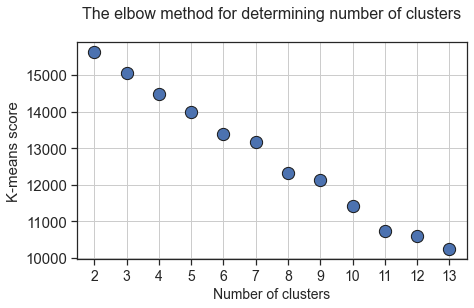

In [334]:
# elbow method shows no apparent elbow
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,14)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,14)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

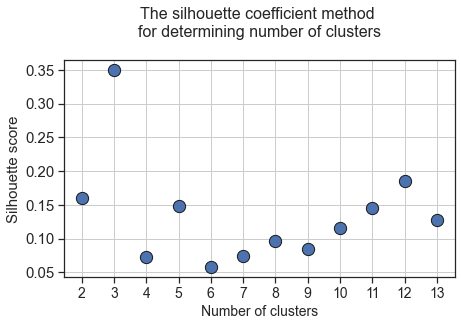

In [358]:
# silouette analysis gives an optimum k=3 at silouette score of 0.35 
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,14)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,14)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


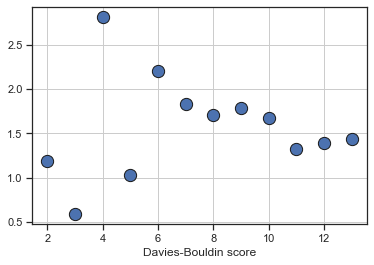

In [365]:
plt.scatter(x=[i for i in range(2,14)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [366]:
#run kmeans clustering using silouette at k =3 in agreement with a low Davies-Bouldin score = 0.58593
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
km_model = kmeans.fit(Xpca)
y_kmeans = kmeans.predict(Xpca)
kmeanlabels=kmeans.labels_
kmeandistances = kmeans.transform(Xpca)

In [367]:
films_kmeans = { 'title': list(df_final.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])
# Indexing and sorting each cluster to identify which are top features that are nearest to the cluster centroid to get a good sense of the topic of the cluster.
frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

0    239
2      8
1      3
Name: cluster, dtype: int64

In [368]:
frame_kmeans

,rank,title,cluster
0,0,The Shawshank Redemption,0
0,1,The Godfather,0
0,2,The Dark Knight,0
0,3,The Godfather Part II,0
0,4,12 Angry Men,0
...,...,...,...
0,245,Aladdin,0
0,246,Jai Bhim,0
0,247,Gandhi,0
0,248,The Help,0


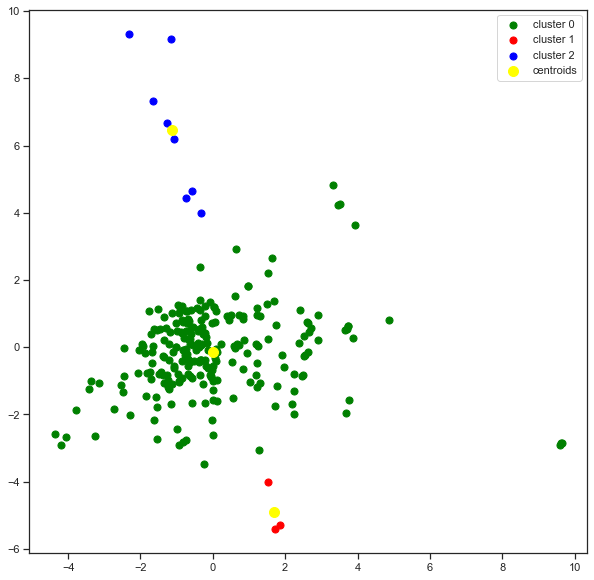

In [363]:
plt.figure(figsize = (10,10))
plt.scatter(Xpca[y_kmeans == 0,0],Xpca[y_kmeans == 0,1],s = 50, c = 'green', label = "cluster 0")
plt.scatter(Xpca[y_kmeans == 1,0],Xpca[y_kmeans == 1,1],s = 50, c = 'red', label = "cluster 1")
plt.scatter(Xpca[y_kmeans == 2,0],Xpca[y_kmeans == 2,1],s = 50, c = 'blue', label = "cluster 2")

plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")

plt.legend()
plt.show()

In [357]:
# the "hot" keywords that describe each clusters.
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(3):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_37_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.loc[i]['title']:
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words: Actor:Leonardo DiCaprio, Runtime, Director:Stanley Kubrick, Director:David Fincher, genre:Drama, Actor:Mark Ruffalo,

Cluster 0 titles: The Shawshank Redemption, The Godfather, The Dark Knight, The Godfather Part II, 12 Angry Men, Schindler's List, The Lord of the Rings: The Return of the King, Pulp Fiction, The Lord of the Rings: The Fellowship of the Ring, The Good, the Bad and the Ugly, Forrest Gump, Fight Club, Inception, The Lord of the Rings: The Two Towers, The Matrix, Goodfellas, One Flew Over the Cuckoo's Nest, Se7en, It's a Wonderful Life, The Silence of the Lambs, City of God, Saving Private Ryan, Life Is Beautiful, The Green Mile, Interstellar, Terminator 2: Judgment Day, Back to the Future, Spirited Away, Psycho, The Pianist, Léon: The Professional, Parasite, The Lion King, Gladiator, American History X, The Usual Suspects, The Departed, The Prestige, Casablanca, Whiplash, Top Gun: Maverick, The Intouchables, Modern Times, Grave of 

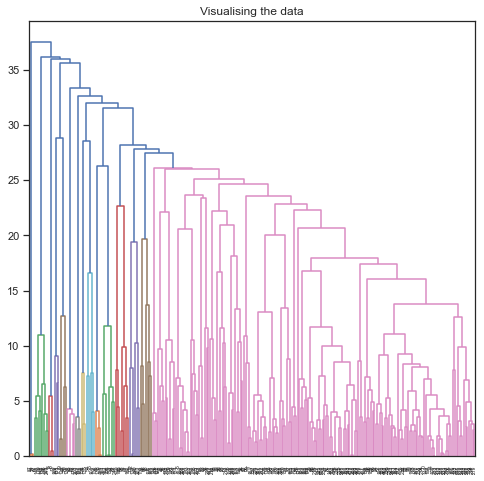

In [355]:
# using the agglomerative clustering approach
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(Xpca, method ='ward')))

In [370]:
from numpy import unique
from numpy import where
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(Xpca)
yhat_2 = model.fit_predict(Xpca)
# retrieve unique clusters
clusters = unique(yhat)

In [375]:
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(Xpca, yhat.labels_, metric='euclidean')

score_AGclustering_d = davies_bouldin_score(Xpca, yhat_2)

In [376]:
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.1784
Davies Bouldin Score: 0.9367


# Conclusion
So far, we scrapped our dataset using OMDB's API and IMDB. 
Our dataset has numerous columns so we performed PCA on the dataset to reduce the dimension and also implemented three different clustering algorithms DBSCAN. 
Kmeans algorithm was implemented after making sure the features were one hot encoded.

Cluster 0 appeared to have the most films with theme centred more around Drama which is in agreement with the skewed distribution of genres seen in the plots above.

DBSCAN gave us number of clusters = 12 which are arbitrary and include noise. 
We choose the k means clustering approach over the agglomerative approach as it gives a higher silouette score of 0.35 and lower Davies Bouldin score = 0.59.

We conclude that this serves as a glimpse into the pattern of the top 250 movies of the International movie database (IMDB). Further approaches can be tried. However, we do not expect very different findings.

# References
Aditya TS, Rajaraman K, Subashini MM. Comparative Analysis of Clustering Techniques for Movie Recommendation. InMATEC Web of Conferences 2018 (Vol. 225, p. 02004). EDP Sciences.

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891